# Blood Transfusion Service Center Data Set 
*link:http://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center*

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [241]:
data = pd.read_csv('transfusion.txt')
X = data.drop(['donated'], axis=1).to_numpy()
y = data['donated'].to_numpy()

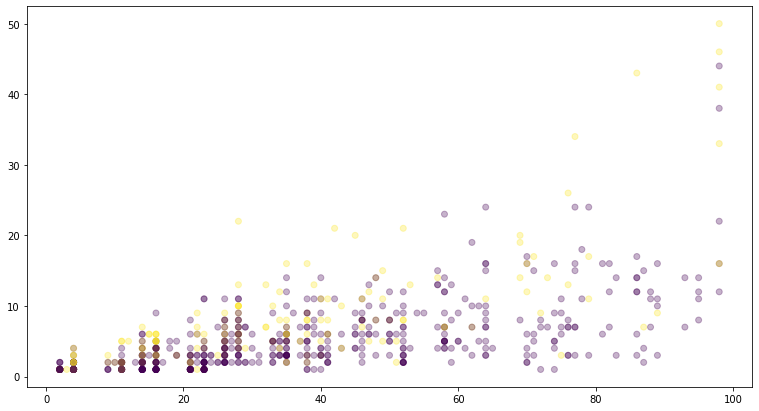

In [242]:
plt.figure(figsize=(13,7))
plt.scatter(X[:, 3], X[:, 1],
            c = y, alpha = .3)

In [243]:
class LogReg:
 
    def __init__(self, alpha=0.01, num_iter=10000,
                 fit_intercept=True, verbose=False):
        self.alpha = alpha
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        
    def sigmoid(self, z):
        return 1/(1/+np.exp(-z))
    
    def add_intercept(self, X):
        intercept=np.ones((X.shape[0],1))
        return np.hstack((intercept, X))
    
    def costFunction(self, X, y):
        return (-y * np.log(h)-(1-y)* np.log(1-h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        self.theta=np.zeros(X.shape[1])
        
        for i in range (self.num_iter):
            z=np.dot(X, self.theta)
            h=self.sigmoid(z)
            gradient = np.dot(X.T, y-h) / y.size
            self.theta -= self.alpha * gradient
        
    
    def predict_prob(self, X):
        X=self.add_intercept(X)
        return self.sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold
                
            

In [244]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.2,
                                                 random_state=12)

In [245]:
model = LogReg(alpha=0.1, num_iter=10000)
model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


In [246]:
y_pred=model.predict(X_test)
y_pred

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater_equal


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [247]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.77      1.00      0.87       115
           1       0.00      0.00      0.00        35

    accuracy                           0.77       150
   macro avg       0.38      0.50      0.43       150
weighted avg       0.59      0.77      0.67       150



Confusion Matrix:
 [[115  35]
 [  0   0]]


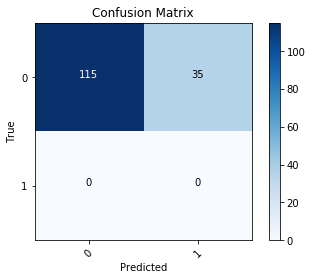

In [248]:
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_pred, y_test)
print('Confusion Matrix:\n',cnf_matrix)

plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')

class_names = set(y) 
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cnf_matrix.max() / 2. 

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

plt.colorbar()